In [8]:
### THIS IS JUST A FUNCTION! THE REAL SHIT HAPPENS IN THE THIRD BLOCK.

from xml.dom import minidom
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt


def predict_stuff(path, model):
    total = 0
    damaged = 0
    # iterate through the names of contents of the folder
    
    HARD_LIMIT = 10000
    counter = 0
    for image_path in os.listdir(path):
        if not image_path.endswith('.jpg'):
            continue
        
        if counter == HARD_LIMIT:
            break
        counter += 1
            
        # create the full input path and read the file
        input_path = os.path.join(path, image_path)

        # make image grayscale
#         img = io.imread(input_path)
#         img_scaled = rescale(img, 2.0 / 4.0)
#         GrayImg = color.rgb2gray(img_scaled)

        # create full output path, 'example.jpg' 
        # becomes 'grayscaled_example.jpg', save the file to disk
#         fullpath = os.path.join(outPath, 'grayscaled_'+image_path)
#         misc.imsave(fullpath, GrayImg)
        img = image.load_img(input_path, target_size = (150,150))
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
#         img_tensor /= 255. # NOT SURE IF I NEED TO DIVIDE BY 255 YET
        
#         print(img_tensor[0])
        result = model.predict(img_tensor)
        result = np.round(result.ravel())
        print(input_path, ': ', result) # damage: 0, non-damage: 1
        if result == 0:
            plt.imshow(image.array_to_img(img_tensor[0]))
            plt.show()
            
            xml_info = input_path + '.aux.xml'
            xmldoc = minidom.parse(xml_info)
            itemlist = xmldoc.getElementsByTagName('GeoTransform')
            for i in itemlist:
                geo_t = i.firstChild.data
                geo_t = geo_t.replace(" ", "")
                geo_t = geo_t.split(",")
                geo_t = [float(i) for i in geo_t]
                print(geo_t) # check if images are rotated (are geo_t[2,4] equal to 0?)
                # Calculate bounding box via GeoTransform
                # source; https://gis.stackexchange.com/questions/291630/what-is-the-formula-to-get-an-images-bounding-box-from-its-gdal-geotransform-a
                xmin = min(geo_t[0], geo_t[0] + 150 * geo_t[1])
                xmax = max(geo_t[0], geo_t[0] + 150 * geo_t[1])
                ymin = min(geo_t[3], geo_t[3] + 150 * geo_t[5])
                ymax = max(geo_t[3], geo_t[3] + 150 * geo_t[5])
                
                print ("Upper Left: (", xmin, ", ", ymax, ")")
                print ("Upper Right: (", xmax, ", ", ymax, ")")
                print ("Bottom Right: (", xmax, ", ", ymin, ")")
                print ("Bottom Left: (", xmin, ", ", ymin, ")")
#             with open(xml_info) as f:
#                 print(f)

#             damaged += 1 # keep track of number of damaged tiles
            
#         total += 1 # keep track of total tiles processed
    
#     print(damaged / total) # how many of the total tiles were damaged?

In [9]:
### PREPROCESS IMAGES

import subprocess

DIR_NAME = 'temp_tiles_2'
# INPUT_IMAGE = '20170903aC0950600w293130n.tif'
INPUT_IMAGE = '20170903aC0954800w293600n.tif'

# make directory to store tiles into
subprocess.call(['mkdir', DIR_NAME])
# create tiles
subprocess.call(['./gdal_retile.py', '-v', '-r', 'bilinear', '-levels', '1', '-ps', '150', '150', '-co', \
                'TILED=YES', '-of', 'JPEG', '-targetDir', DIR_NAME, INPUT_IMAGE])

print("Completed Preprocessing.")
# reference:
# gdal_retile.py -v -r bilinear -levels 1 -ps 150 150 -co "TILED=YES" -of JPEG -targetDir <target_dir> <input_image>

KeyboardInterrupt: 

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_12.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_36.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_31_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_25_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_63_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_25_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_31_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_42.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_32.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_26.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_16.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_09.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_28.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_19.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_38.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_18.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_11.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_43_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_59.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_18_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_11.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_44.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_31.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_12_59.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_29.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_24.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_09_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_09_55.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_55_58.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_14_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_09.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_46_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_38_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_22_39.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_46_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_14_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_14_11.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_44.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_46_31.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_09_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_38.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_59.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_12_58.jpg :  [1.]
/Users/maxwu/ibm/Da

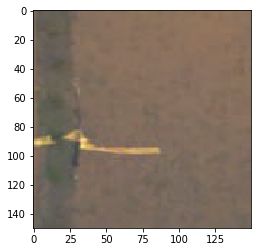

[-95.79282377285853, 2.6948989412895e-06, 0.0, 29.578675553416748, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.79282377285853 ,  29.578675553416748 )
Upper Right: ( -95.79241953801733 ,  29.578675553416748 )
Bottom Right: ( -95.79241953801733 ,  29.578271318575553 )
Bottom Left: ( -95.79282377285853 ,  29.578271318575553 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_49_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_15.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_60.jpg :  [1.]
/Users/maxwu/ibm/

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_32_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_60_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_62.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_60_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_32_17.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_13_32.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_12.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_09_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_13_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_13.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_11.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_31.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_38.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_59.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_58.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_20.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_38.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_15.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_35_44.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_31.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_46_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_14_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_48.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_19.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_39.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_58.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_04.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_18_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_35.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_49.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_28.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_16.jpg :  [1.]
/Users/maxwu/ibm/Da

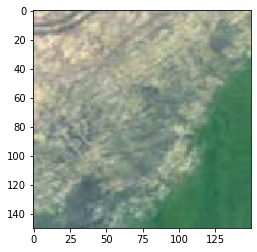

[-95.78190943214629, 2.6948989412895e-06, 0.0, 29.576250144369585, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.78190943214629 ,  29.576250144369585 )
Upper Right: ( -95.7815051973051 ,  29.576250144369585 )
Bottom Right: ( -95.7815051973051 ,  29.57584590952839 )
Bottom Left: ( -95.78190943214629 ,  29.57584590952839 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_35_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_32.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_16.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_26.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_35_53.jpg :  [1.]
/Users/maxwu/ibm/Dama

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_13_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_55_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_62.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_55_17.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_13_42.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_17.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_16.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_27.jpg :  [1.]
/Users/maxwu/ibm/Da

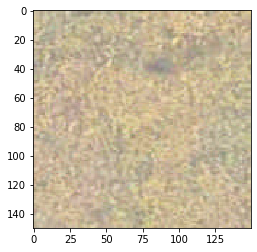

[-95.7940364773821, 2.6948989412895e-06, 0.0, 29.577462848893166, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.7940364773821 ,  29.577462848893166 )
Upper Right: ( -95.7936322425409 ,  29.577462848893166 )
Bottom Right: ( -95.7936322425409 ,  29.57705861405197 )
Bottom Left: ( -95.7940364773821 ,  29.57705861405197 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_43_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_02.jpg :  [1.]
/Users/maxwu/ibm/DamageD

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_62.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_17.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_23.jpg :  [1.]
/Users/maxwu/ibm/Da

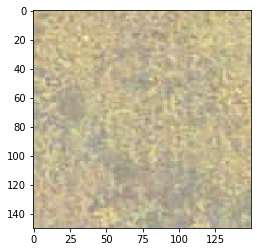

[-95.79363224254091, 2.6948989412895e-06, 0.0, 29.577462848893166, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.79363224254091 ,  29.577462848893166 )
Upper Right: ( -95.79322800769971 ,  29.577462848893166 )
Bottom Right: ( -95.79322800769971 ,  29.57705861405197 )
Bottom Left: ( -95.79363224254091 ,  29.57705861405197 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_12.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_53.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_51.jpg :  [0.]


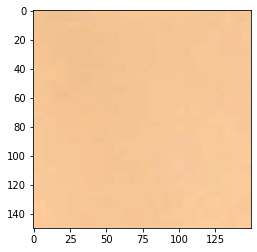

[-95.77988825794033, 2.6948989412895e-06, 0.0, 29.575441674687198, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.77988825794033 ,  29.575441674687198 )
Upper Right: ( -95.77948402309913 ,  29.575441674687198 )
Bottom Right: ( -95.77948402309913 ,  29.575037439846003 )
Bottom Left: ( -95.77988825794033 ,  29.575037439846003 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_55.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_54.jpg :  [1.]
/Users/maxwu/ibm/

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_18.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_60.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_35.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_50.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_35_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_54.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_33_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_12_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_49_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_49.jpg :  [1.]
/Users/maxwu/ibm/Da

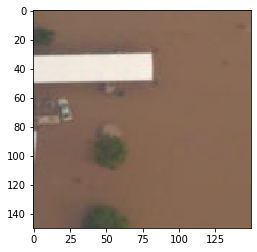

[-95.79646188642926, 2.6948989412895e-06, 0.0, 29.58029249278152, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.79646188642926 ,  29.58029249278152 )
Upper Right: ( -95.79605765158806 ,  29.58029249278152 )
Bottom Right: ( -95.79605765158806 ,  29.579888257940326 )
Bottom Left: ( -95.79646188642926 ,  29.579888257940326 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_58.jpg :  [1.]
/Users/maxwu/ibm/Dam

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_05.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_50.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_58.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_29.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_30.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_59.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_18.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_35.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_38.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_31.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_44.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_11.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_62.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_16.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_23_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_52.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_31_17.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_38_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_38_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_31_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_63_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_22_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_36_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_36_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_22_43.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_26.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_43.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_12.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_56.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_12.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_42.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_27.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_08.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_28_25.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_01.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_29.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_09.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_51_54.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_01.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_21.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_28.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_08.jpg :  [1.]
/Users/maxwu/ibm/Da

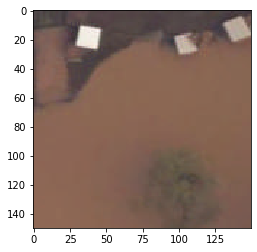

[-95.78837718960538, 2.6948989412895e-06, 0.0, 29.57665437921078, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.78837718960538 ,  29.57665437921078 )
Upper Right: ( -95.78797295476419 ,  29.57665437921078 )
Bottom Right: ( -95.78797295476419 ,  29.576250144369585 )
Bottom Left: ( -95.78837718960538 ,  29.576250144369585 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_35.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_60.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_18.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_15.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_43_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_49.jpg :  [1.]
/Users/maxwu/ibm/Dam

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_63.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_43.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_16.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_57.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_30_36.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_45_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_03_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_19_62.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_36.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_46.jpg :  [0.]


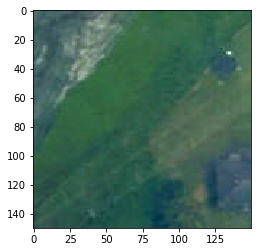

[-95.78190943214629, 2.6948989412895e-06, 0.0, 29.575845909528393, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.78190943214629 ,  29.575845909528393 )
Upper Right: ( -95.7815051973051 ,  29.575845909528393 )
Bottom Right: ( -95.7815051973051 ,  29.575441674687198 )
Bottom Left: ( -95.78190943214629 ,  29.575441674687198 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_52.jpg :  [0.]


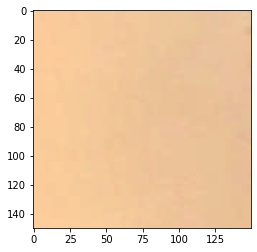

[-95.77948402309913, 2.6948989412895e-06, 0.0, 29.575845909528393, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.77948402309913 ,  29.575845909528393 )
Upper Right: ( -95.77907978825793 ,  29.575845909528393 )
Bottom Right: ( -95.77907978825793 ,  29.575441674687198 )
Bottom Left: ( -95.77948402309913 ,  29.575441674687198 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_26.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_34_47.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_32.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_16.jpg :  [1.]
/Users/maxwu/ibm/

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_39.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_32_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_60_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_35_39.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_21_58.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_26_51.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_60_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_32_24.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_22_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_36_55.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_48_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_52_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_13_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_55_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_41_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_07_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_09_58.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_24.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_29.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_20.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_55.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_15_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_40_48.jpg :  [1.]
/Users/maxwu/ibm/Da

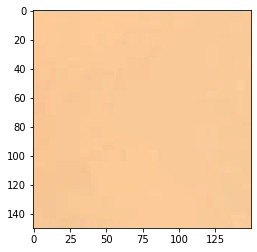

[-95.77988825794033, 2.6948989412895e-06, 0.0, 29.575845909528393, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.77988825794033 ,  29.575845909528393 )
Upper Right: ( -95.77948402309913 ,  29.575845909528393 )
Bottom Right: ( -95.77948402309913 ,  29.575441674687198 )
Bottom Left: ( -95.77988825794033 ,  29.575441674687198 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_04.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_29_29.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_20_19.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_10.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_61_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_27_38.jpg :  [1.]
/Users/maxwu/ibm/

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_05_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_59_45.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_34.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_18_19.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_55.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_20.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_42_61.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_41.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_39.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_17_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_58_38.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_15.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_35.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_44_15.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_02_40.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_18_18.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_16_35.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_60.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_18_30.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_50_48.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_11_14.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_57_41.jpg :  [1.]
/Users/maxwu/ibm/Da

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_53_33.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_01_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_47_46.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_08_37.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_32.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_12.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_12_47.jpg :  [1.]
/Users/maxwu/ibm/Da

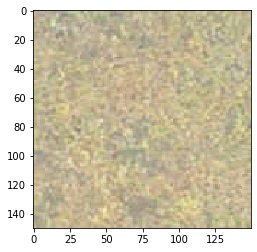

[-95.79363224254091, 2.6948989412895e-06, 0.0, 29.57786708373436, 0.0, -2.6948989412898798e-06]
Upper Left: ( -95.79363224254091 ,  29.57786708373436 )
Upper Right: ( -95.79322800769971 ,  29.57786708373436 )
Bottom Right: ( -95.79322800769971 ,  29.577462848893166 )
Bottom Left: ( -95.79363224254091 ,  29.577462848893166 )
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_03.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_23.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_04_22.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_56_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_10_57.jpg :  [1.]
/Users/maxwu/ibm/Dam

/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_62_06.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_24_53.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_39_02.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_07.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_37_13.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_49_56.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_06_27.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_12_52.jpg :  [1.]
/Users/maxwu/ibm/DamageDetection/Satellite-Analysis/temp_tiles_2/20170903aC0954800w293600n_54_07.jpg :  [1.]
/Users/maxwu/ibm/Da

In [10]:
### RUN THE PIPELINE

from keras.models import load_model

MODEL = 'tomnod_everything_relu_Adam.h5'

model = load_model(MODEL)

# get absolute path of image
full_path = os.path.join(os.getcwd(), DIR_NAME)

# params: (folder-with-images, model)
predict_stuff(full_path, model)

In [4]:
# COMPARISON TESTS (DONT DELETE)

# img_path = '/Users/maxwu/ibm/DamageDetection/damage/-96.960704_28.783292.jpeg'

# img = image.load_img(img_path, target_size = (150,150))
# img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis = 0)
# img_tensor /= 255.

# print("ligma")
# print(img_tensor.shape)
# print(img_tensor)